<div style="background-color:rgba(20, 20, 20, 0.8); color:white; padding:10pt" >    

# **Lab Introduction to Image Processing**
&mdash; **`alain.lebret@ensicaen.fr`** &mdash;

### Part: Frequency Filters


## Introduction

Transitioning between the spatial and frequency domains is a cornerstone of image processing. This is achieved using four functions from the module "`fft`" of the *Numpy* library: [`fft2()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html), which computes the 2D discrete Fourier Transform (DFT); [`ifft2()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html#numpy.fft.ifft2), which computes the 2D inverse DFT; and [`fftshift()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift), which shifts the zero-frequency component to the center of the spectrum (and [`ifftshift()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html#numpy.fft.ifftshift) its inverse).

For optimal computation of the Fourier transform, the input image should preferably be square. If the image is not square, it may be necessary to pad the image into a larger square matrix filled with zeros (creating a black image) to maintain the aspect ratio and facilitate the transform.

### A Brief Overview of the Fourier Transform

The Fourier transform is a fundamental tool in signal and image processing, enabling the transition from spatial (or temporal) representation to frequency representation. The 2D Fourier Transform $F(u, v)$ of an image $f(x, y)$ is mathematically defined as:

$F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \cdot e^{-j2\pi(ux + vy)} dx dy$

where $u$ and $v$ represent the spatial frequencies along the $x$ and $y$ axes, respectively, and $j$ denotes the imaginary unit.

The Fast Fourier Transform (FFT) is an algorithm that efficiently computes the Discrete Fourier Transform (DFT) and its inverse. The DFT is given by:

$ F(u, v) = \sum\limits_{m=0}^{M-1} \sum\limits_{n=0}^{N-1} f(m, n) \cdot e^{-j2\pi(um/M + vn/N)} $

where $M$ and $N$ are the dimensions of the image. 

Using the FFT significantly reduces computation time, which is particularly noticeable with large images.

In frequency filtering, the Fourier transform is indispensable as it allows for direct manipulation of an image's frequencies. This provides a powerful method for image filtering, offering an alternative to spatial domain techniques. Frequency filters can attenuate or enhance certain frequencies within an image, enabling noise reduction, contrast enhancement, or extraction of specific image features.

## Dépendencies

In [1]:
#
# Loads required libraries 
#
import math
import numpy as np
import skimage                  # scikit-image
from skimage import data        # some images to use
from skimage import io          # open, write, etc. image files
from skimage import color       # conversion between color spaces 
from skimage import filters     # threshold_mean 
from skimage import util        # random_noise 
from skimage import restoration # richardson_lucy 
from skimage.morphology import disk # to use with "median" filter
from scipy.signal import convolve2d # convolution
from numpy.fft import fft2, ifft2, fftshift, ifftshift # Fourier transform
from matplotlib import pyplot as plt

In [2]:
root_path = '../resources'
smaller = root_path + '/256x256'
medium = root_path + '/512x512'
various = root_path + '/various'

1. Generating the Fourier Transform
In the following example, we calculate and display the discrete Fourier transform (DFT) of the image "girlface.png". The input image is 512 $\times$ 512 pixels in size and is an 8-bit grayscale image.

```python
image = io.imread(medium + '/girlface.png')
fft_image = fft2(image)
```

The quadrants of the DFT output have their zero-frequency components at the four corners. To reposition the zero-frequency component to the center, we use the [`fftshift()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftshift.html#scipy.fft.fftshift) function. This "centering" operation is crucial for visualizing the DFT in a more interpretable manner. Remember to apply the inverse shift using `ifftshift()` before computing the inverse DFT with `ifft2()`:

```python
fft_image_shift = fftshift(fft_image)
```

For better visualization of the DFT's magnitude, we use a logarithmic scale:

```python
plt.imshow(np.log(1 + np.abs(fft_image_shift)), cmap='magma_r')
plt.colorbar()
plt.show()
```

> Note: The "magma_r" colormap is used here to visualize the magnitude of the FFT. *Matplotlib* offers various other colormaps, which can be explored in their [colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).

To compute and display the inverse Fourier transform, we proceed as follows:

```python
# Shift the zero-frequency component back to the original position
fft_image_mod = ifftshift(fft_image_shift)
# Compute the inverse FFT
image_mod = ifft2(fft_image_mod)
plt.imshow(np.abs(image_mod), cmap='gray')
plt.show()
```

Note that the Fourier transform and its inverse produce complex-valued images. The [`real`](https://numpy.org/doc/stable/reference/generated/numpy.real.html) and [`imag`](https://numpy.org/doc/stable/reference/generated/numpy.imag.html#numpy.imag) attributes can be used to access their real and imaginary parts, respectively. The [`abs()`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) and [`angle()`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html) functions can be used to obtain the magnitude and phase angle:

```python
real_part = fft_image.real
imaginary_part = fft_image.imag
magnitude = np.abs(fft_image)
phase_angle = np.angle(fft_image)
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 1.1**

Calculate and visualize the 2D Fourier transform of the grayscale image you worked with in the previous session.

##### Instructions:
- Load the grayscale image from the previous session. Ensure that the image is indeed in grayscale format.
- Utilize the `fft2()` function from the NumPy library to compute the 2D Fourier transform of the image.
- Apply the `fftshift()` function to center the zero-frequency component.
- Visualize the magnitude spectrum of the Fourier transform using a logarithmic scale for better perception of details.
- Display the resulting image using an appropriate colormap to enhance visual contrast, such as 'gray' for a grayscale image.

Note: If you encounter any issues with image formats or array shapes, make sure to preprocess the image accordingly before applying the Fourier transform.

---
    
</div>

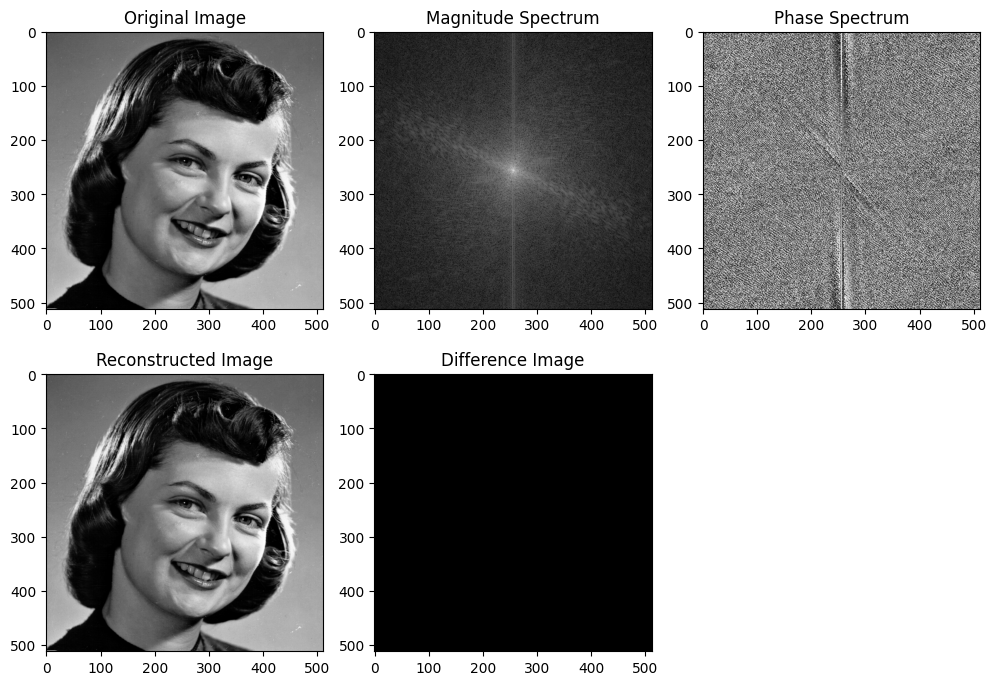

In [3]:
#
# TO COMPLETE WITH YOUR CODE
#


The difference between the original synthetic image and the reconstructed image after the inverse Fourier transform (IFFT) should theoretically be close to zero (or a black image in a visual representation) if the reconstruction is perfect. However, there may be several reasons why the difference is not completely black:

Numerical Precision: Fourier transform operations, especially when performed on computers, are subject to numerical precision errors. These small errors can accumulate and lead to minor differences between the original and reconstructed images.

Complex Number Processing: The Fourier transform produces complex numbers. When these complex numbers are manipulated and then reversed (via IFFT), inaccuracies can occur, especially if the imaginary parts are not handled properly.

Rounding and Type Conversion: If images are converted between different data types (for example, from float to uint8) or if rounding is performed, this can also introduce differences.

Image Visualization: The way the difference is calculated and visualized can also affect the appearance of the difference image. For example, even very small differences can appear as gray variations instead of complete black if the color scale is not adjusted correctly.

In the provided code, the difference is calculated as the absolute value of the difference between the original and reconstructed images. This means that even minimal differences will appear as gray values in the resulting image.

To confirm that the reconstruction is correct and that the differences are negligible, one can examine the numerical values of the difference or use more robust image comparison measures, such as PSNR (Peak Signal-to-Noise Ratio) or SSIM (Structural Similarity Index).

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 1.2**

- Generate synthetic images containing various geometric shapes such as squares, rectangles, and disks. Vary the sizes and orientations of these shapes within the images.
- Visualize the 2D Fourier transforms of these synthetic images. Specifically, display the magnitude, phase, real part, and imaginary part of the transform. Enhance the visibility of the magnitude spectrum by also visualizing it on a logarithmic scale.
- After performing the Fourier transform (FFT) and then the inverse Fourier transform (IFFT) on these images, calculate and display the difference between the original synthetic image and the reconstructed image obtained post-IFFT.

##### Analyze the results:
- What do you observe in the difference image?
- Interpret the significance of any discrepancies between the original and reconstructed images. What might be the cause of these discrepancies?
- Discuss the implications of your observations in the context of image processing and the properties of the Fourier transform.

---
    
</div>

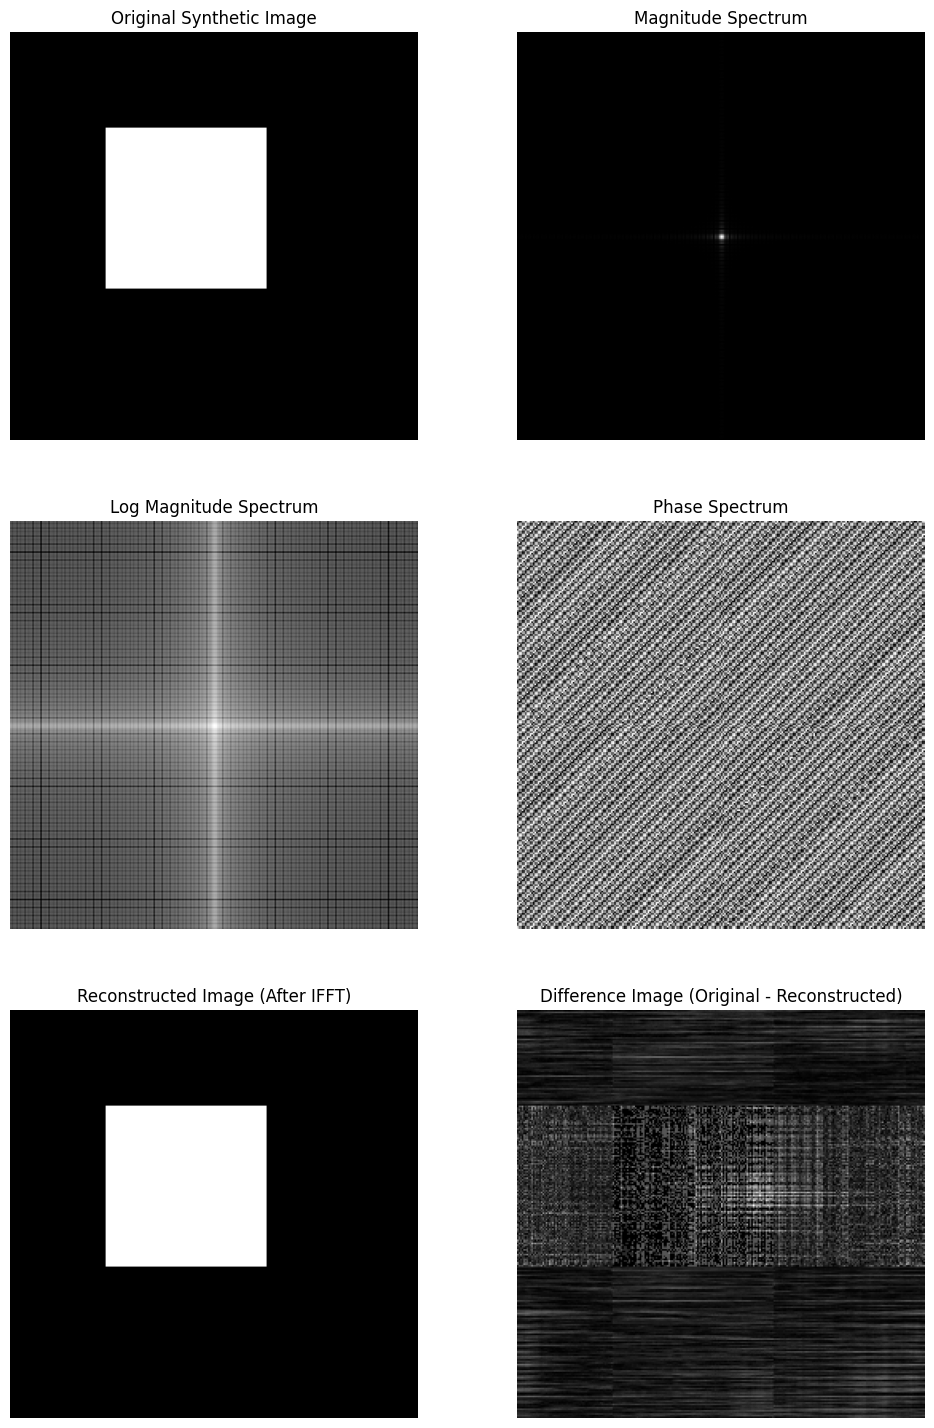

In [13]:
#
# TO COMPLETE WITH YOUR CODE
#


### Importance of Phase and Magnitude

In the Fourier domain, most of the energy is concentrated at the center of the frequency spectrum, which corresponds to the "low-frequency" components of the image domain. These low-frequency components represent the gradual changes in brightness across the image, such as background variations and large uniform areas. In contrast, the "high-frequency" components are associated with rapid changes in intensity, such as edges and fine details.

While the phase information in the Fourier domain may appear visually chaotic and resemble noise, it is crucial for accurately reconstructing the image. The phase encodes the position of image features within the spatial domain and is essential for preserving the structure of the image during reconstruction.

The following example demonstrates what happens when we mix the magnitude of one image with the phase of another. Both grayscale images `im1` and `im2` are of the same size:

```python
fft1 = np.fft.fftshift(np.fft.fft2(im1))
fft2 = np.fft.fftshift(np.fft.fft2(im2))

magnitude1 = np.abs(fft1)
magnitude2 = np.abs(fft2)
phase1 = np.angle(fft1)
phase2 = np.angle(fft2)

# Create a new FFT by combining the magnitude of one image with the phase of the other
fft1_new = magnitude1 * np.exp(1j * phase2)  # 1j is the imaginary unit
fft2_new = magnitude2 * np.exp(1j * phase1)

# Perform the inverse FFT to reconstruct the images
img1_new = np.fft.ifft2(np.fft.ifftshift(fft1_new))
img2_new = np.fft.ifft2(np.fft.ifftshift(fft2_new))

# Display the reconstructed images
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.abs(img1_new), cmap='gray')
axes[0].set_title('Image with Magnitude of im1 and Phase of im2')

axes[1].imshow(np.abs(img2_new), cmap='gray')
axes[1].set_title('Image with Magnitude of im2 and Phase of im1')

plt.tight_layout()
plt.show()
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 1.3: Exploring the Role of Phase and Magnitude in Image Reconstruction

In this exercise, we aim to understand the distinct roles of phase and magnitude in the context of the Fourier transform applied to image processing. We will do this by conducting a phase-swapping experiment between two images.

##### Steps:

- Select two distinct images of identical dimensions. For a more pronounced effect, choose images with different content and textures (e.g., an architectural photo of a building and an artistic drawing).
- Compute the 2D Fourier transform (FFT) for each image.
- Interchange the phase information between the two images while keeping their original magnitudes intact.
- Perform an inverse Fourier transform (IFFT) to reconstruct the images with swapped phase information.
- Visualize and compare the reconstructed images to their originals.

##### Expected Observations:

- Analyze the visual differences in the reconstructed images compared to the original ones.
- Discuss the changes in appearance and structure. How does the phase swap affect the overall content and recognizability of the images?
- Reflect on the importance of phase in maintaining the integrity of spatial information within images.

Note: This exercise will demonstrate that while magnitude tells us about the intensity of the frequencies, phase holds the key to spatial configuration and the recognizable features of an image.

---
    
</div>

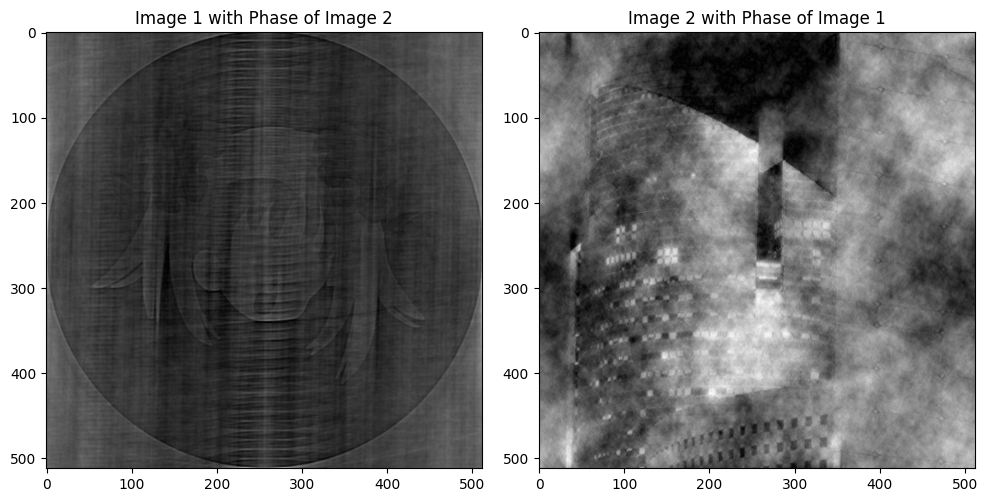

In [40]:
#
# TO COMPLETE WITH YOUR CODE
#


## 2. Linear Filtering and FFT

### Denoising Images Using Frequency Domain Filters
The goal of this section is to explore the application of linear filters in the frequency domain to remove noise from images. Noise can be introduced into images through various sources such as sensor imperfections, environmental conditions during image capture, or transmission errors. It often manifests as random variations in pixel values, which can degrade the quality of the image and obscure important details.

By transforming an image into the frequency domain using the Fast Fourier Transform (FFT), we can analyze the frequency components of the noise and the underlying image separately. This separation allows us to design and apply filters that specifically target the noise frequencies while preserving the important features of the image.

#### Objectives:

- Understand the concept of image noise and its frequency characteristics.
- Learn to apply the FFT to convert images into the frequency domain.
- Synthesize and apply linear filters that attenuate noise frequencies.
- Use the inverse FFT to convert the filtered image back to the spatial domain.
- Evaluate the effectiveness of the denoising process by comparing the filtered image with the original.

Through this process, we aim to enhance image clarity and quality by reducing the presence of noise, thereby making the true content of the image more discernible.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 2.1: Noise Reduction in the Frequency Domain
In this exercise, we will delve into the process of noise reduction using frequency domain techniques. We will start with synthetic images, introduce noise, and then apply various filters to mitigate the noise effects.

##### Procedure:
- Introduce artificial noise (such as Gaussian noise or salt-and-pepper noise) to the synthetic images that were created earlier.
- Compute the Fourier Transform (FFT) of these noisy images and visualize the magnitude spectra. Note any observable changes that the noise introduces in the frequency domain.
- Design and apply different linear filters within the spectral domain aimed at reducing the noise. Examples of such filters can be found at the end of this Jupyter-Lab notebook. Consider using low-pass filters, which are commonly used for noise reduction.
- Analyze the effectiveness of these spectral domain filters by comparing them with spatial domain averaging filters that you have previously encountered. Discuss the differences in the results.
- Finally, apply the most effective noise reduction filter to a real-world noisy image that you have processed before. Observe and document the improvements in image quality.
    
---
    
</div>

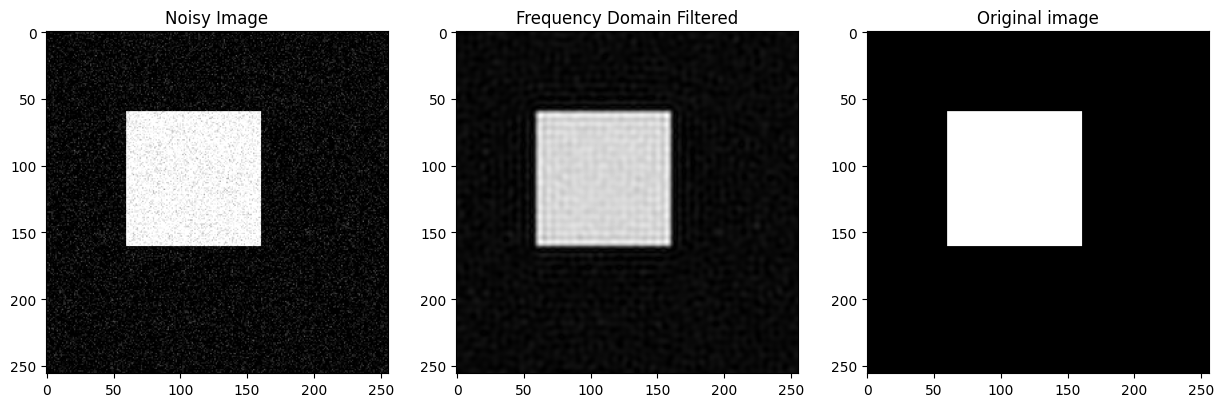

In [21]:
#
# TO COMPLETE WITH YOUR CODE
#


### Analysis of the Frequency Spectrum of an Acquired Image
In this section, we will examine the frequency spectrum of the image "dust.png," which serves as an example of an image acquired under laboratory conditions. This analysis will help us identify and understand various imperfections that can occur during the image acquisition process.

##### Objectives:

- To perform a Fourier Transform on "dust.png" to transition from the spatial domain to the frequency domain.
- To analyze the resulting frequency spectrum for insights into the types of noise or artifacts present in the image.
- To understand how these imperfections can affect the overall quality of the image and the accuracy of subsequent image processing tasks.

By studying the frequency spectrum, we can detect issues such as dust particles, sensor noise, or other anomalies that may not be immediately apparent in the spatial representation of the image. This knowledge is crucial for developing effective preprocessing steps to mitigate these imperfections before further analysis.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### Exercise No. 2.2: Preprocessing and Spectrum Analysis of "dust.png"
In this exercise, we will focus on preparing an image with visible imperfections for frequency domain analysis and consider potential correction methods.

##### Steps:

- Preprocess the image "dust.png" by removing any overlaid text or extraneous information that could interfere with the Fourier Transform (FFT). This may involve cropping or masking certain areas of the image.
- Display the preprocessed image. Examine it closely to identify any visible imperfections. Describe these imperfections and hypothesize their possible causes. Consider factors such as dust particles, sensor noise, or lighting conditions during image acquisition.
- Compute the FFT of the cleaned image and visualize its magnitude spectrum on a logarithmic scale. This "log" dynamic range can help reveal subtler aspects of the spectrum that might be indicative of the imperfections you observed.
- Analyze how the imperfections you noted in the spatial domain are represented in the frequency domain. Look for unusual spikes or patterns in the spectrum that correspond to the anomalies in the image.
- Reflect on the insights gained from the spectrum analysis. Propose a potential method for correcting the observed imperfection. This could involve designing a filter that targets specific frequencies or employing image restoration techniques.

##### Expected Learning Outcomes:

- Develop skills in image preprocessing to facilitate effective FFT analysis.
- Enhance your ability to identify and articulate image imperfections and their potential causes.
- Gain experience in interpreting the frequency spectrum of an image and relating it to spatial domain features.
- Begin to think critically about methods for image improvement based on frequency domain information.

Note: Document your observations and any hypotheses or conclusions you draw at each step. This will be valuable for developing a systematic approach to image correction.

---
    
</div>

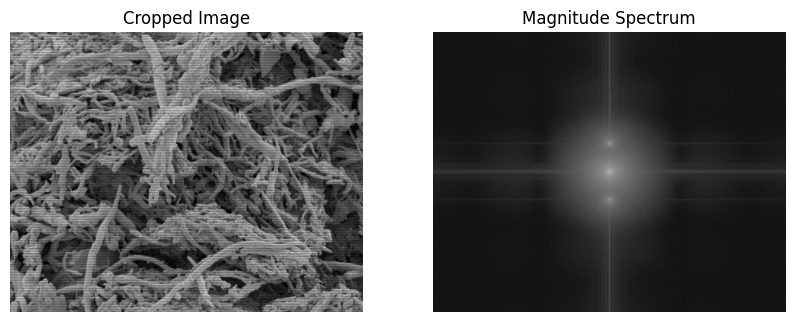

In [22]:
#
# TO COMPLETE WITH YOUR CODE
#


### Elimination of Periodic Patterns Using a Notch Filter
In this section, we will explore the use of notch filters, which are specialized tools in image processing designed to target and remove periodic noise from images. Periodic noise can manifest as repetitive patterns or disturbances that often arise from mechanical or electrical interference during the image acquisition process.

#### Objectives:

- To understand the concept of a notch filter and its role in the frequency domain for image enhancement.
- To apply notch filters to an image with periodic patterns, assessing their effectiveness in reducing or eliminating these unwanted artifacts.
- To analyze the resultant images for improvements in clarity and overall visual quality.

Notch filters work by attenuating specific frequencies in the Fourier transform of an image. By carefully designing a notch filter to target the frequencies corresponding to the periodic noise, we can significantly reduce the impact of these disturbances on the image.

#### The practical exercises will involve:

- Identifying the frequencies associated with the periodic noise by examining the Fourier spectrum of the image.
- Designing and applying a notch filter to suppress these frequencies.
- Performing an inverse Fourier transform to return to the spatial domain and visualize the effects of the filtering process.
- Comparing the original and filtered images to evaluate the success of the noise reduction technique.

Through these manipulations, we aim to gain hands-on experience with notch filters and appreciate their value in improving image quality in scenarios where periodic noise is present.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 2.3: Notch Filter Design and Application
In this exercise, our goal is to design and apply a notch filter to remove specific artifacts from the image "dust.png". These artifacts, in the form of periodic patterns, were identified during our previous spectral analysis. We will now take steps to mitigate these unwanted features using a targeted filtering approach.

##### Steps:

###### Filter Design:
- Based on the spectral analysis conducted earlier, determine the frequency bands where the periodic patterns are most prominent.
- Develop a template for a notch filter that will target these bands. For the sake of simplicity, we will use a perfect square - shape for the rejection zone in the frequency domain.
- Decide on the width and the central cutoff frequency for each band that needs to be filtered out. This will require careful consideration of the spectral analysis to ensure that the filter accurately targets the noise without affecting the underlying image content.

###### Filter Implementation:
- Implement the designed notch filter in the spectral domain and visualize its response. This will help confirm that the filter is correctly targeting the intended frequencies.

###### Filter Application:
- Apply the synthesized notch filter to the Fourier transform of "dust.png".
- Perform an inverse Fourier transform to convert the filtered image back to the spatial domain.

###### Result Analysis:
- Visualize the filtered image and compare it to the original.
- Observe and document any changes in the image. Have the periodic patterns been reduced or eliminated? Are there any unintended consequences of the filtering process?

##### Expected Outcomes:

- A clear understanding of how to design a notch filter based on spectral analysis.
- Practical experience in implementing and applying notch filters to real-world images.
- Insight into the effectiveness of notch filtering in removing periodic noise and the potential impact on overall image quality.

Note: It is important to document each step of the process, including the rationale behind the design choices for the notch filter and any observations made during the result analysis. This documentation will be invaluable for refining the filter design and for future reference.

---
    
</div>

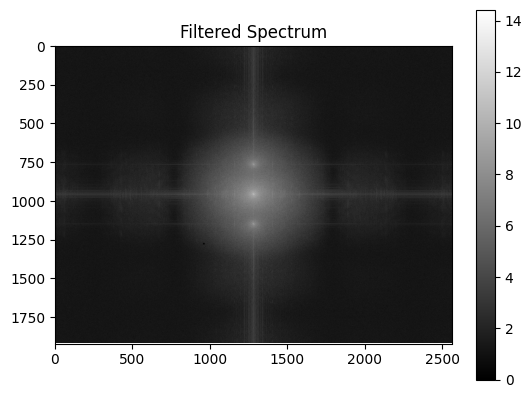

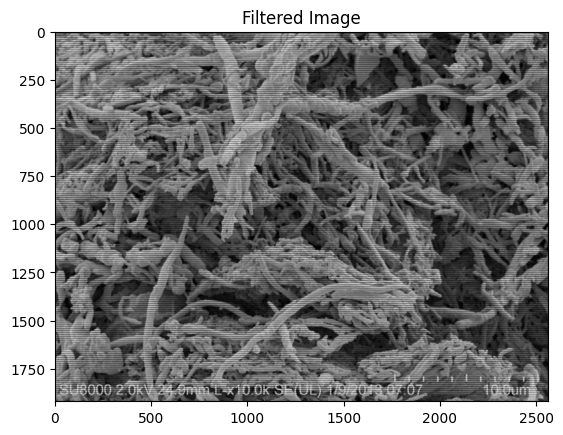

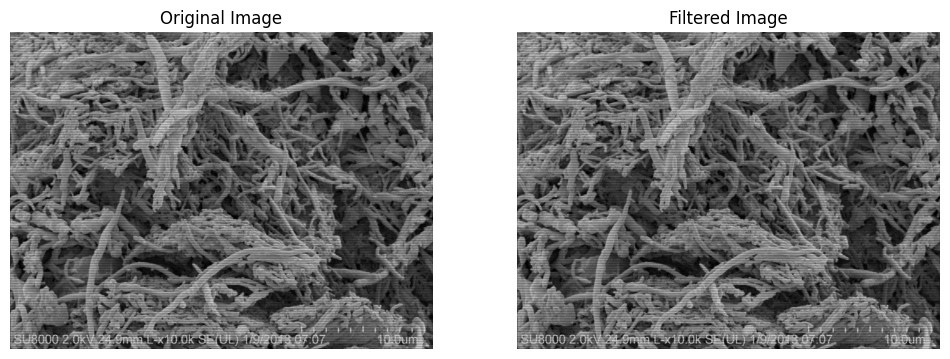

In [26]:
#
# TO COMPLETE WITH YOUR CODE
#


## 3. Deconvolution and Deblurring
After applying a notch filter to the image "dust.png," we've successfully mitigated periodic noise artifacts. However, a residual blur persists, attributed to the instrumental response of the imaging device, characterized by the point-spread function (PSF). This PSF has subtly compromised the sharpness and fine details within the image. The PSF specific to "dust.png" can be found in the same directory, stored in the file "psf_dust.npy".

The next step in our image restoration journey is to address this blur. Deconvolution is a process used to reverse the effects of convolution on an image, which in this case, is the blurring introduced by the PSF. By deconvolving the image with its PSF, we aim to retrieve the original, unblurred image, or at least an approximation of it.

Several deconvolution techniques exist, each with its own advantages and limitations. These include:
- Inverse Filtering: The simplest deconvolution method, which works well when the PSF is known and noise is negligible.
- Wiener Filtering: A more sophisticated approach that takes into account both the degradation function (PSF) and noise characteristics.
- Richardson-Lucy Deconvolution: An iterative method that is particularly effective for count-based imaging like astronomical or fluorescence microscopy images.

In this exercise, we will explore these deconvolution methods to remove the remaining blur from "dust.png". We will compare their effectiveness and assess the quality of the deblurred images.

### Objectives:

- Load the PSF from the file "psf_dust.npy" and normalize it if necessary.
- Apply the various deconvolution techniques to the filtered image of "dust.png".
- Visualize and compare the results of each deconvolution method.
- Analyze the deblurred images to determine which method provides the best restoration of fine details.

By the end of this section, we should have a clearer image and a deeper understanding of the deconvolution process and its role in image processing.

Additional Guidance:

Ensure that the PSF is correctly centered and normalized before using it for deconvolution.
When visualizing the results, consider using side-by-side comparisons or difference images to highlight the improvements.
Discuss the trade-offs between the different deconvolution methods, such as the balance between noise amplification and detail restoration.





## 3. Deconvolution and Deblurring

Once the original image "dust.png" is filtered, there remains a blur due to the instrumental response of the capture device (PSF - point-spread function) which has degraded some fine details of the images. The PSF of the image "dust.png" is available in the same folder (file "psf_dust.npy").

We now propose to remove the slight blur that remains in this image. Several solutions are available to us.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 4.7**

- Apply the Lucy-Richardson algorithm and the function [`richardson_lucy()`](https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.richardson_lucy) from the `restoration` module using 6 iterations, then 30 iterations. You will need the [`numpy.load()`](https://numpy.org/doc/stable/reference/generated/numpy.load.html) function to load the PSF. Be careful: the `richardson_lucy()` function takes as input an image with real values between 0 and 1 (remember to take the modulus of the inverse Fourier transform, then divide it by the max value)!
- Compare the results obtained.
    
---
    
</div>

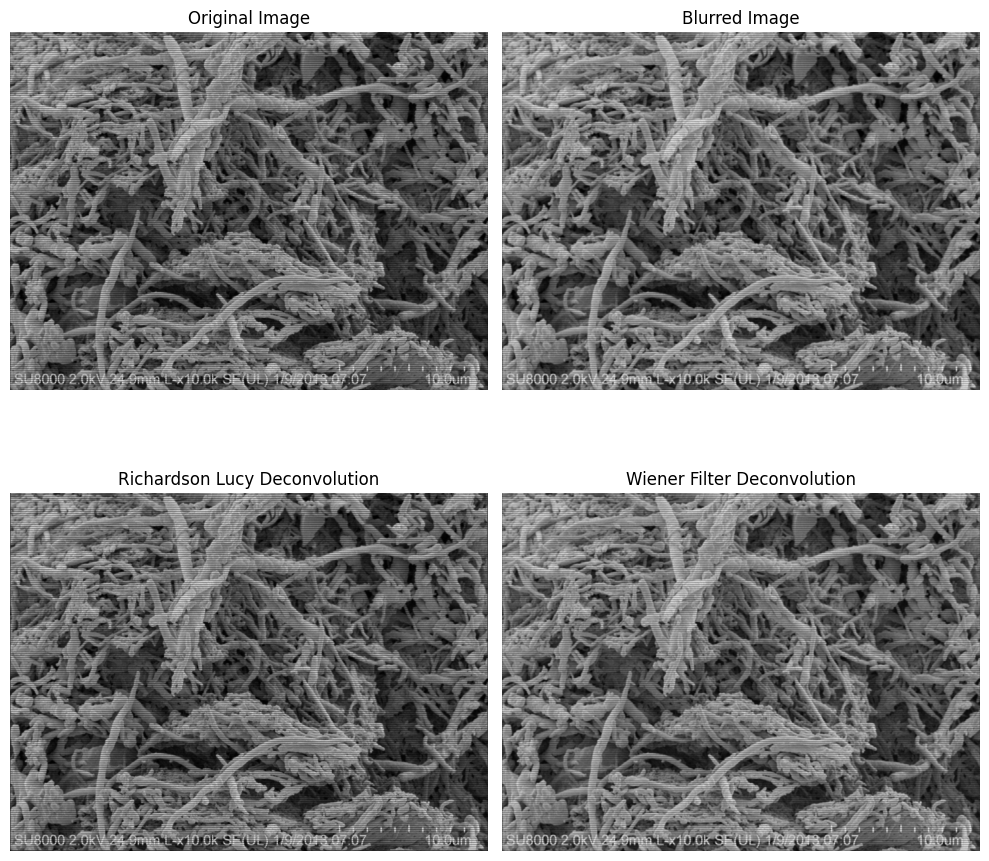

In [47]:
#
# TO COMPLETE WITH YOUR CODE
#


-----

## Annex Codes

The code for cropping an image seems to have an incorrect definition of the upper_left_corner and lower_right_corner. The skimage.util.crop function also seems to be used incorrectly. The crop function takes a tuple of tuples indicating how many pixels to remove from each side of the image.

### A1. Creating Shapes

#### White Rectangle on a Black Background

```python
shape = (512, 512)
rectangle = np.zeros(shape, dtype=np.uint8)
upper_left_corner = (250, 40)
lower_right_corner = (262, 472)
rr, cc = skimage.draw.rectangle(start=upper_left_corner, 
                                end=lower_right_corner, 
                                shape=shape)
rectangle[rr, cc] = 1
```

#### White Disk on a Black Background

```python
shape = (512, 512)
center = (256, 256)
radius = 50
disk = np.zeros(shape, dtype=np.uint8)
rr, cc = skimage.draw.disk(center, radius, shape=shape)
disk[rr, cc] = 1
```

### A2. Some Image Operations

#### Extract a Sub-Image

```python
upper_left_corner = (50, 100)
lower_right_corner = (50, 50)
cropped = skimage.util.crop(image, 
                            (upper_left_corner, lower_right_corner, (0,0)),
                            copy=False)
# OR

cropped2 = image[50:50, 50:100]
```

### A3. Some Filters

#### Ideal Low-Pass and High-Pass Filters

```python
def distance_np(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base
```

#### Butterworth Low-Pass and High-Pass Filters

```python
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base
```

#### Gaussian Low-Pass and High-Pass Filters

```python
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
```

#### Example of Using Filters

```python
image = io.imread(medium + '/girlface.png')

# show images
figure = plt.figure(figsize=(10, 10))

figure.add_subplot(3, 3, 1)
plt.imshow(image, cmap='gray')

original = np.fft.fft2(image)
figure.add_subplot(3, 3, 2)
plt.imshow(np.log(1+np.abs(original)), cmap='gray')

center = np.fft.fftshift(original)
figure.add_subplot(3, 3, 3)
plt.imshow(np.log(1+np.abs(center)), cmap='gray')

LowPassCenter = center * idealFilterLP(50, image.shape)
figure.add_subplot(3, 3, 4)
plt.imshow(np.log(1+np.abs(LowPassCenter)), cmap='gray')

LowPass = np.fft.ifftshift(LowPassCenter)
figure.add_subplot(3, 3, 5)
plt.imshow(np.log(1+np.abs(LowPass)), cmap='gray')

inverse_LowPass = np.fft.ifft2(LowPass)
figure.add_subplot(3, 3, 5)
plt.imshow(np.abs(inverse_LowPass), cmap='gray')
```